In [ ]:
#!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pedestrian-count-dcc-2022.csv to pedestrian-count-dcc-2022 (1).csv


In [ ]:
df_2022=pd.DataFrame()
df_2022=pd.read_csv('pedestrian-count-dcc-2022.csv',index_col=None)
#df_2022.head()

**1. Cleaning data**

a. Dropping columns
  1. In and Out columns as total is present
  2. Empty columns(Missing step counter)

In [ ]:
df_2022.isnull().values.any()


True

Drop IN and OUT columns for each sensor location as they're not required. 

In [ ]:
drop_cols=[]
for col in df_2022.columns:
  if 'IN' in col:
    drop_cols.append(col)
  if 'OUT' in col:
    drop_cols.append(col)

for col in df_2022.columns:
  if col in drop_cols:
    df_2022.drop(col, axis=1, inplace=True)

In [ ]:
#df_2022.head()

Drop empty columns

In [ ]:
for col in df_2022:
  if df_2022[col].isnull().any():
    print(col,': Null Values:', df_2022[col].isnull().sum().sum())
    sum=df_2022[col].isnull().sum().sum()
    if sum >= len(df_2022[col]):
      print(col,'DROPPED as no entries are present')
      df_2022.drop(col, axis=1, inplace=True)
      
   ### print(pd.isnull(df_2022))
  else:
    print(col,':', 'No null Vals')

Time : No null Vals
Aston Quay/Fitzgeralds : Null Values: 2232
Aston Quay/Fitzgeralds DROPPED as no entries are present
Bachelors walk/Bachelors way : Null Values: 1
Baggot st lower/Wilton tce inbound : Null Values: 1
Baggot st upper/Mespil rd/Bank : Null Values: 1
Capel st/Mary street : Null Values: 1
College Green/Bank Of Ireland : Null Values: 25
College Green/Church Lane : Null Values: 1
College st/Westmoreland st : Null Values: 1
D'olier st/Burgh Quay : Null Values: 1
Dame Street/Londis : Null Values: 1
Dawson Street/Molesworth : Null Values: 1
Grafton st/Monsoon : Null Values: 1944
Grafton Street / Nassau Street / Suffolk Street : Null Values: 1
Grafton Street/CompuB : Null Values: 1
Grand Canal st upp/Clanwilliam place : Null Values: 1
Grand Canal st upp/Clanwilliam place/Google : Null Values: 1
Henry Street/Coles Lane/Dunnes : Null Values: 8
Liffey st/Halfpenny Bridge (Counter Missing) : Null Values: 2232
Liffey st/Halfpenny Bridge (Counter Missing) DROPPED as no entries are pr

Finding location of null values

In [ ]:
df_2022.isnull().values.any()

True

In [ ]:
for col in df_2022:
  if df_2022[col].isnull().any():
    print(col, df_2022[col].isnull().sum().sum())

Bachelors walk/Bachelors way 1
Baggot st lower/Wilton tce inbound 1
Baggot st upper/Mespil rd/Bank 1
Capel st/Mary street 1
College Green/Bank Of Ireland 25
College Green/Church Lane 1
College st/Westmoreland st 1
D'olier st/Burgh Quay 1
Dame Street/Londis 1
Dawson Street/Molesworth 1
Grafton st/Monsoon 1944
Grafton Street / Nassau Street / Suffolk Street 1
Grafton Street/CompuB 1
Grand Canal st upp/Clanwilliam place 1
Grand Canal st upp/Clanwilliam place/Google 1
Henry Street/Coles Lane/Dunnes 8
Mary st/Jervis st 1
Newcomen Bridge/Charleville mall inbound 1
Newcomen Bridge/Charleville mall outbound 1
North Wall Quay/Samuel Beckett bridge East 1
North Wall Quay/Samuel Beckett bridge West 1
O'Connell St/Parnell St/AIB 1
O'Connell st/Princes st North 7
Phibsborough Rd/Enniskerry Road 1
Phibsborough Rd/Munster St 1
Richmond st south/Portabello Harbour inbound 1
Richmond st south/Portabello Harbour outbound 1
Talbot st/Guineys 1
Talbot st/Murrays Pharmacy 1
Westmoreland Street East/Fleet s

Can use linear regression / mean to fill values


Filling empty values with zero for now as assuming no value was recorded

In [ ]:
for col in df_2022:
  df_2022[col] = df_2022[col].fillna(0)

In [ ]:
df_2022.isnull().values.any()

False

In [ ]:
for col in df_2022:
  if df_2022[col].isnull().any():
    print(col, df_2022[col].isnull().sum().sum())



---


Merge rows for the entire day


Calculate sum for each column


In [ ]:
df_2022["Time"]=df_2022["Time"].str.replace(",","")

Adding utc=True 


In [ ]:
df_2022["Time"] = pd.to_datetime(df_2022["Time"], utc=True)
df_2022["Time"] = df_2022["Time"].dt.strftime('%b %-d %Y  %-I:%M %p')

split date and time to different columns

In [ ]:
df_2022['Dates'] = pd.to_datetime(df_2022['Time']).dt.date
df_2022['Times'] = pd.to_datetime(df_2022['Time']).dt.time

In [ ]:
df_2022_concat=pd.DataFrame()
df_2022_concat=df_2022.groupby('Dates',as_index=None).sum()
df_2022_concat

,Dates,Bachelors walk/Bachelors way,Baggot st lower/Wilton tce inbound,Baggot st upper/Mespil rd/Bank,Capel st/Mary street,College Green/Bank Of Ireland,College Green/Church Lane,College st/Westmoreland st,D'olier st/Burgh Quay,Dame Street/Londis,...,O'Connell St/Parnell St/AIB,O'Connell st/Princes st North,Phibsborough Rd/Enniskerry Road,Phibsborough Rd/Munster St,Richmond st south/Portabello Harbour inbound,Richmond st south/Portabello Harbour outbound,Talbot st/Guineys,Talbot st/Murrays Pharmacy,Westmoreland Street East/Fleet street,Westmoreland Street West/Carrolls
0,2022-01-01,13858.0,1576.0,3455.0,29063.0,15228.0,5768.0,3582.0,9427.0,12743.0,...,6392.0,9210.0,1598.0,0.0,3837.0,3643.0,33028.0,0.0,1295.0,10001.0
1,2022-01-02,15556.0,1548.0,3606.0,44441.0,19360.0,7132.0,4493.0,12433.0,16367.0,...,7769.0,9947.0,2604.0,0.0,4204.0,3405.0,47577.0,0.0,2181.0,13078.0
2,2022-01-03,14845.0,2200.0,4549.0,36459.0,19453.0,7626.0,5026.0,13068.0,14547.0,...,8246.0,10465.0,3010.0,0.0,5271.0,3714.0,61043.0,0.0,2380.0,12803.0
3,2022-01-04,17589.0,7724.0,7943.0,40887.0,22944.0,9397.0,6421.0,13136.0,20442.0,...,9246.0,13008.0,1979.0,1.0,7158.0,4659.0,56531.0,0.0,3348.0,16461.0
4,2022-01-05,16422.0,8253.0,6967.0,45511.0,22107.0,9268.0,6658.0,14286.0,20643.0,...,9382.0,12929.0,2201.0,32.0,5987.0,5304.0,37216.0,0.0,3647.0,15387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2022-03-30,18643.0,10449.0,11841.0,28185.0,17962.0,15576.0,12253.0,28641.0,28886.0,...,12489.0,20151.0,2899.0,48.0,9602.0,6014.0,44092.0,64486.0,11164.0,21002.0
89,2022-03-31,20692.0,9717.0,12266.0,32020.0,22126.0,18078.0,14710.0,21201.0,30152.0,...,13272.0,21428.0,3217.0,3.0,9118.0,6731.0,45304.0,74178.0,12946.0,25064.0
90,2022-04-01,23266.0,9494.0,11750.0,32617.0,23494.0,19080.0,15069.0,26143.0,30406.0,...,13228.0,21948.0,3699.0,0.0,8858.0,6312.0,40674.0,77429.0,12528.0,27059.0
91,2022-04-02,22304.0,7164.0,10012.0,33825.0,26253.0,19990.0,14548.0,28998.0,31124.0,...,13862.0,22293.0,3128.0,0.0,13195.0,6988.0,46485.0,68115.0,12516.0,0.0


In [ ]:
df_2022_concat.dtypes

Dates                                               object
Bachelors walk/Bachelors way                       float64
Baggot st lower/Wilton tce inbound                 float64
Baggot st upper/Mespil rd/Bank                     float64
Capel st/Mary street                               float64
College Green/Bank Of Ireland                      float64
College Green/Church Lane                          float64
College st/Westmoreland st                         float64
D'olier st/Burgh Quay                              float64
Dame Street/Londis                                 float64
Dawson Street/Molesworth                           float64
Grafton st/Monsoon                                 float64
Grafton Street / Nassau Street / Suffolk Street    float64
Grafton Street/CompuB                              float64
Grand Canal st upp/Clanwilliam place               float64
Grand Canal st upp/Clanwilliam place/Google        float64
Henry Street/Coles Lane/Dunnes                     float

In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Time                                             2232 non-null   object 
 1   Bachelors walk/Bachelors way                     2232 non-null   float64
 2   Baggot st lower/Wilton tce inbound               2232 non-null   float64
 3   Baggot st upper/Mespil rd/Bank                   2232 non-null   float64
 4   Capel st/Mary street                             2232 non-null   float64
 5   College Green/Bank Of Ireland                    2232 non-null   float64
 6   College Green/Church Lane                        2232 non-null   float64
 7   College st/Westmoreland st                       2232 non-null   float64
 8   D'olier st/Burgh Quay                            2232 non-null   float64
 9   Dame Street/Londis            

Selecting columns with Mean > 20K values to filter places with highest footfall

In [ ]:
df_final=pd.DataFrame()
for col in df_2022_concat:
  if df_2022_concat[col].dtypes==object:
    df_final[col]=df_2022_concat[col].copy()
    continue
  if df_2022_concat[col].mean()>20000:
    print (col, df_2022_concat[col].mean())
    df_final[col]=df_2022_concat[col].copy()

df_final.head()
#df_final.shape
#df_final.describe()

Capel st/Mary street 38504.10752688172
College Green/Bank Of Ireland 21613.0
Dame Street/Londis 27937.913978494624
Grafton Street/CompuB 32740.655913978495
Henry Street/Coles Lane/Dunnes 61827.11827956989
Newcomen Bridge/Charleville mall inbound 69800.1182795699
Newcomen Bridge/Charleville mall outbound 151532.32258064515
North Wall Quay/Samuel Beckett bridge East 53508.290322580644
North Wall Quay/Samuel Beckett bridge West 20499.21505376344
Talbot st/Guineys 46237.11827956989
Talbot st/Murrays Pharmacy 23576.84946236559


,Dates,Capel st/Mary street,College Green/Bank Of Ireland,Dame Street/Londis,Grafton Street/CompuB,Henry Street/Coles Lane/Dunnes,Newcomen Bridge/Charleville mall inbound,Newcomen Bridge/Charleville mall outbound,North Wall Quay/Samuel Beckett bridge East,North Wall Quay/Samuel Beckett bridge West,Talbot st/Guineys,Talbot st/Murrays Pharmacy
0,2022-01-01,29063.0,15228.0,12743.0,9709.0,26573.0,69129.0,179049.0,23237.0,7155.0,33028.0,0.0
1,2022-01-02,44441.0,19360.0,16367.0,17037.0,45318.0,76923.0,151867.0,32204.0,7988.0,47577.0,0.0
2,2022-01-03,36459.0,19453.0,14547.0,19693.0,45903.0,84399.0,163509.0,49309.0,16078.0,61043.0,0.0
3,2022-01-04,40887.0,22944.0,20442.0,22070.0,56713.0,75639.0,155158.0,71660.0,23146.0,56531.0,0.0
4,2022-01-05,45511.0,22107.0,20643.0,24740.0,53466.0,86415.0,137266.0,68476.0,23530.0,37216.0,0.0


In [ ]:
df_final=df_final.reset_index(drop=True)
df_final.head(14)

,Dates,Capel st/Mary street,College Green/Bank Of Ireland,Dame Street/Londis,Grafton Street/CompuB,Henry Street/Coles Lane/Dunnes,Newcomen Bridge/Charleville mall inbound,Newcomen Bridge/Charleville mall outbound,North Wall Quay/Samuel Beckett bridge East,North Wall Quay/Samuel Beckett bridge West,Talbot st/Guineys,Talbot st/Murrays Pharmacy
0,2022-01-01,29063.0,15228.0,12743.0,9709.0,26573.0,69129.0,179049.0,23237.0,7155.0,33028.0,0.0
1,2022-01-02,44441.0,19360.0,16367.0,17037.0,45318.0,76923.0,151867.0,32204.0,7988.0,47577.0,0.0
2,2022-01-03,36459.0,19453.0,14547.0,19693.0,45903.0,84399.0,163509.0,49309.0,16078.0,61043.0,0.0
3,2022-01-04,40887.0,22944.0,20442.0,22070.0,56713.0,75639.0,155158.0,71660.0,23146.0,56531.0,0.0
4,2022-01-05,45511.0,22107.0,20643.0,24740.0,53466.0,86415.0,137266.0,68476.0,23530.0,37216.0,0.0
5,2022-01-06,46102.0,18944.0,19345.0,23438.0,53633.0,77778.0,149371.0,45146.0,16694.0,30282.0,0.0
6,2022-01-07,63507.0,22266.0,22006.0,22314.0,50964.0,75559.0,139887.0,41486.0,14525.0,44453.0,0.0
7,2022-01-08,47563.0,22478.0,21122.0,22771.0,73944.0,76383.0,148048.0,36712.0,9196.0,39099.0,0.0
8,2022-01-09,48576.0,18801.0,17539.0,20072.0,48727.0,74435.0,135315.0,26102.0,7907.0,47161.0,0.0
9,2022-01-10,39613.0,20600.0,17574.0,22563.0,53695.0,70353.0,134888.0,35202.0,13859.0,38272.0,0.0


In [ ]:
def get_col_list():
  col_list=[]
  length=df_final.columns.size-1
  for col in df_final:
  #print(col)
    if df_2022_concat[col].dtypes==object:
      continue
    else:
      col_list.append(col)
  return col_list

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 28, 23.
plt.rcParams['figure.max_open_warning'] = 50

In [ ]:
def plot_loc(col_list):
    n = len(col_list)
    max_width = 3 ##images per row
    height, width = n//max_width +1, max_width
    #the floor division // rounds the result down to the nearest whole number
    fig, axs = plt.subplots(height, width)

    for i in range(n):
        x = np.array(df_final['Dates'])
        y = np.array(df_final[col_list[i]])
        ax = axs.flat[i]
        #The numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. 
        ax.plot(x, y, '-', label='plot '+str(i+1))
        ax.set_title(col_list[i])

    ## access each axes object via axs.flat
    for ax in axs.flat:
        ## check if something was plotted 
        if not bool(ax.has_data()):
            fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

    fig.show()

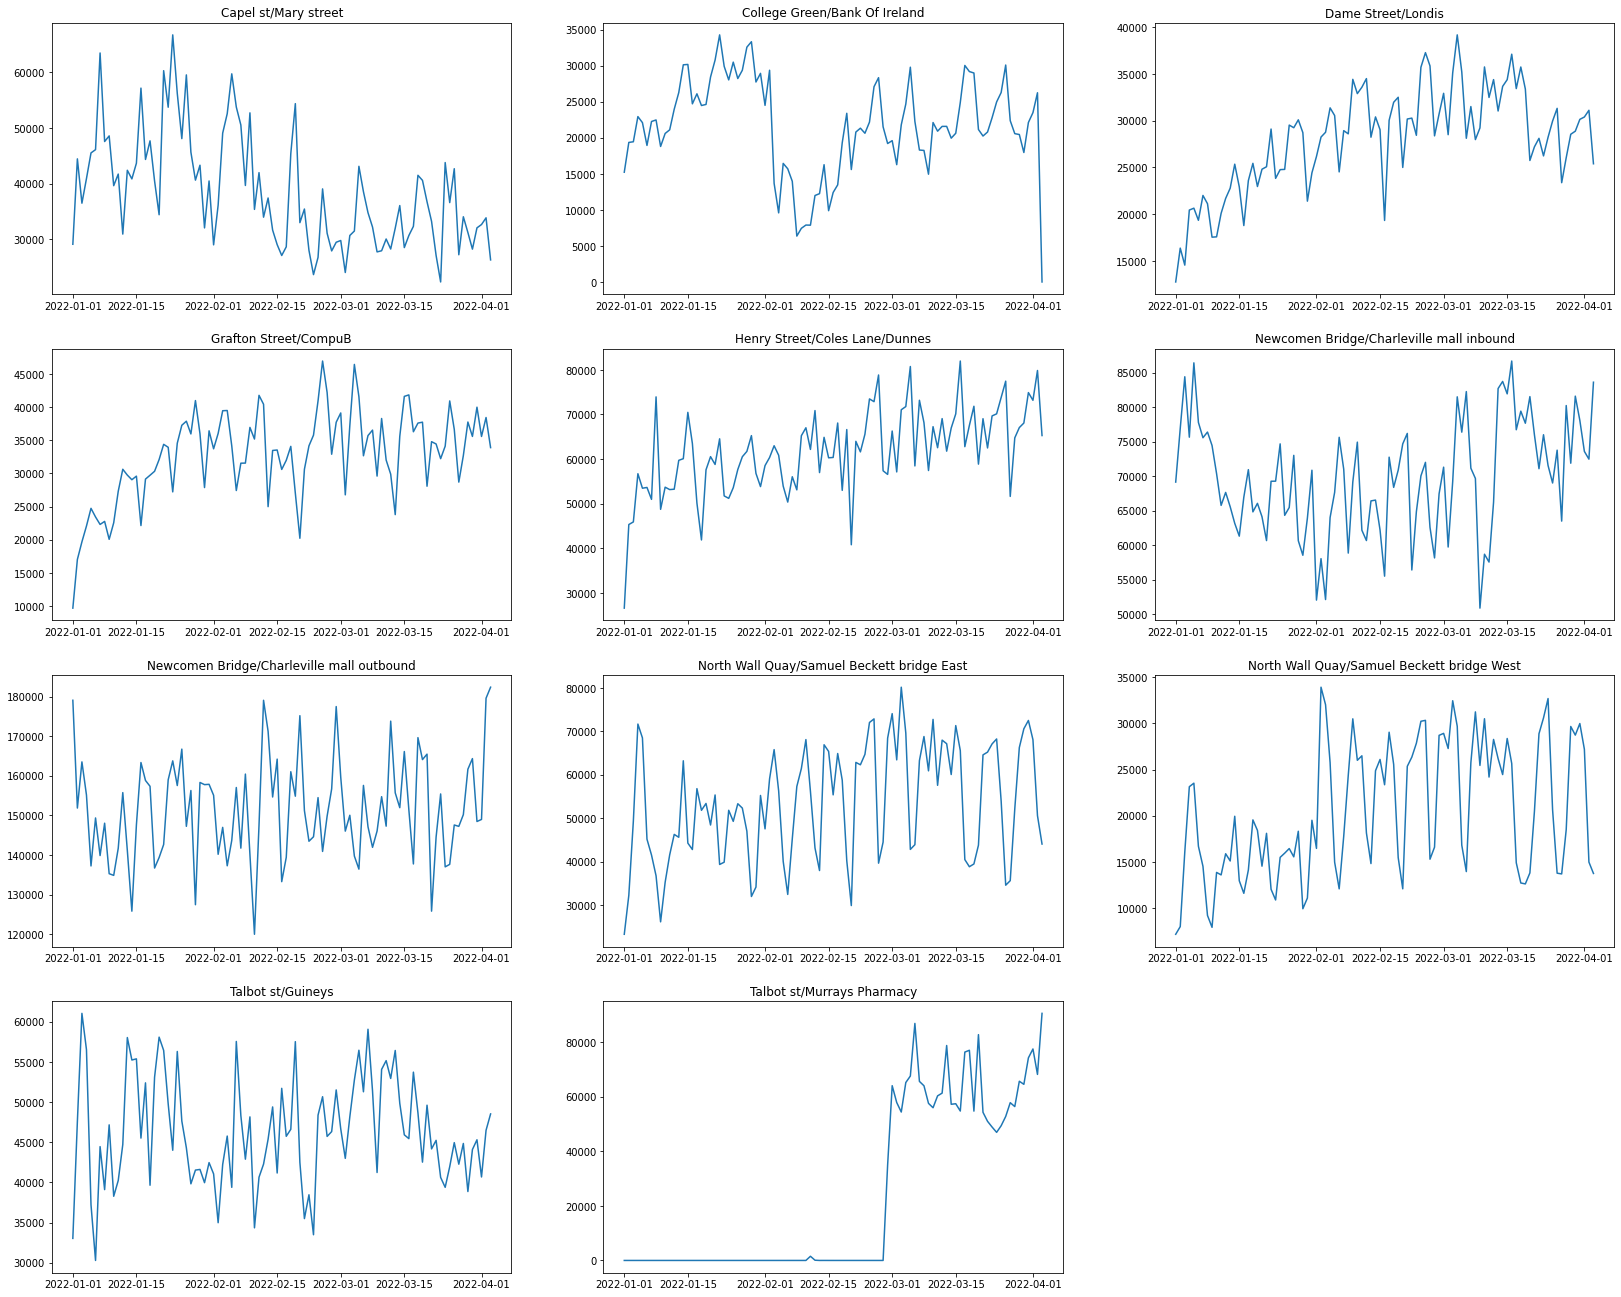

In [ ]:
loc_list=get_col_list()
plot_loc(loc_list)

Calculating Power generation

In [ ]:
from datetime import date
from datetime import datetime

# Potential Power Generation calculation

In [ ]:
def elec_daily(locn, datel):
  p=0
  v=0
  v= df_final.loc[df_final['Dates']==date(datel[0],datel[1],datel[2]),locn]
  p=int(v)*10*5
  return int(v), p

In [ ]:
#a=input('Enter the location:')
from pandas.core.tools.datetimes import to_datetime
location = 'Capel st/Mary street' #@param ['Capel st/Mary street', 'College Green/Bank Of Ireland', 'Dame Street/Londis', 'Grafton Street/CompuB', 'Henry Street/Coles Lane/Dunnes', 'Newcomen Bridge/Charleville mall inbound', 'Newcomen Bridge/Charleville mall outbound', 'North Wall Quay/Samuel Beckett bridge East', 'North Wall Quay/Samuel Beckett bridge West', 'Talbot st/Guineys', 'Talbot st/Murrays Pharmacy'] {allow-input: true}
datep='2022-01-12' #@param {type:"date"}
date_par=to_datetime(datep)
v, calc_pow=elec_daily(location,[date_par.year, date_par.month, date_par.day])
#print(pow)
print('On date '+datep+', a total of '+ str(v) +' footsteps at '+location+', We could have generated '+str(calc_pow/1000)+'kW of energy!')

On date 2022-01-12, a total of 30895 footsteps at Capel st/Mary street, We could have generated 1544.75kW of energy!
